In [0]:
from pyspark.sql import SparkSession
data_spark = SparkSession.builder.appName('DataFrame_article').getOrCreate()
data_spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## LOAD THE DATA & CLEAN DATA

In [0]:
# Replace 'your_table_name' with the name of your table in Databricks
table = "heart_data"

# Read the table data into a Spark DataFrame
spark_df = spark.sql(f"SELECT * FROM {table}")

# Convert the Spark DataFrame to a Pandas DataFrame
df = spark_df.toPandas()

# Display the first few rows of the DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0,Up,0


In [0]:
#Number of rows and columes
num_rows, num_columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 918
Number of columns: 12


In [0]:
df.dtypes

Out[601]: Age               object
Sex               object
ChestPainType     object
RestingBP         object
Cholesterol       object
FastingBS         object
RestingECG        object
MaxHR             object
ExerciseAngina    object
Oldpeak           object
ST_Slope          object
HeartDisease      object
dtype: object

In [0]:
#Percent of missing values by columns
missing_percent = df.isnull().sum() / len(df) * 100

missing_percent

Out[602]: Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [0]:
# Find columns with "N/A" values
na_columns = df.columns[df.apply(lambda x: x.astype(str).str.contains("N/A").any())].tolist()

# Replace "N/A" with mean of the column
for column in na_columns:
    mean_value = df[column].replace("N/A", np.nan).astype(float).mean()
    df[column] = df[column].replace("N/A", mean_value)

columns_to_convert = ['Age', 'Cholesterol', 'RestingBP', 'Oldpeak', 'HeartDisease', 'MaxHR']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [0]:
df.dtypes

Out[604]: Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## DATA EXPLORATION

**1. Data describe - correlation - heatmap**

In [0]:
#Check describe of the numeric features collumn
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [0]:
#Check correlation of the features collumn
df.corr().style.background_gradient(cmap='RdBu')

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148,-0.232741
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,-0.400421,0.403951,1.000000


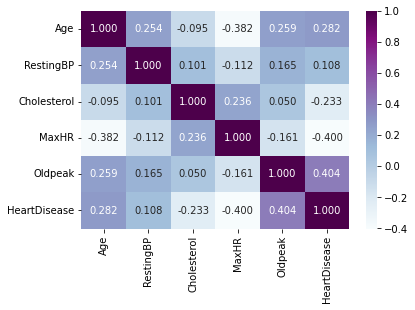

In [0]:
#plot heatmap
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True, fmt=".3f")

The heatmap and correlation table show that Oldpeak, FastingBS, RestingBP and Age has positive correlation with HeartDisease while MaxHR and Cholesterol have negative impact. The relations are weak or slightly strong but there is no features has strong correlation with heart disease or with other features. Therefore, we keep all the features for training and prediction steps.

**2. Label distribution**

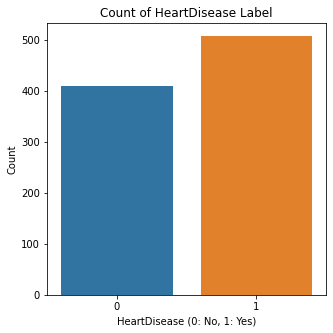

In [0]:
#compare two classes
plt.figure(figsize=(5,5))
sns.countplot(x='HeartDisease', data=df)
plt.xlabel('HeartDisease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Count of HeartDisease Label')
plt.show()

The label contains 2 classes 0 and 1 in which class 1 is greater than class 0. However, the difference between class is not significant, therefore, this dataset is not imbalanced dataset. We do not need to use resampling technique to handle it.

**3. Compare attributes between label**

In [0]:
#Divided all features in dataframe into categorical and numerical features
numeric_features = list((df.drop(columns = 'HeartDisease').select_dtypes(include=["int64", "float64"]).columns).values)
categorical_features = list((df.drop(columns = 'HeartDisease').select_dtypes(include=["object"]).columns).values)

print("numeric_features is:", numeric_features)
print("categorical_features is:", categorical_features)

numeric_features is: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features is: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


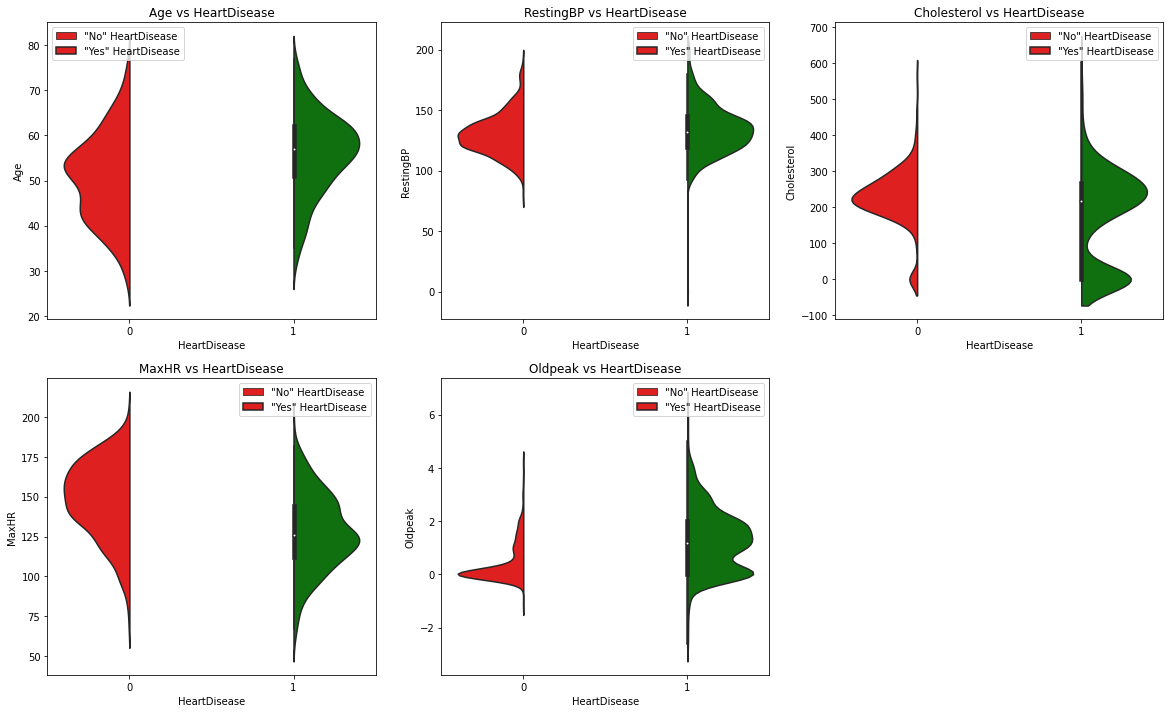

In [0]:
colors = ['red','green']
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,12))

for i in range(len(numeric_features)):
    plt.subplot(2,3,i+1)
    ax = sns.violinplot(x = "HeartDisease", y = numeric_features[i], data = df, hue = "HeartDisease", split = True, palette = colors, edgecolor = 'black')
    plt.xlabel('HeartDisease')
    plt.ylabel(numeric_features[i])
    title = numeric_features[i] + ' vs HeartDisease'
    plt.legend(['"No" HeartDisease','"Yes" HeartDisease'])
    plt.title(title)

Violin splot show the distribution of features:
* People with heart disease are older than people without this disease
* People with heart disease have higher blood pressure (RestingBP) than people without this disease
* FastingBS and OldPeak also impact to heart disease as people with higher index of these features have more risk getting heart disease
* Cholesterol and MaxHR also impact heart disease, however, people with lower MaxHR and people with wider range of distribution in Cholesterol have more change getting this disease.

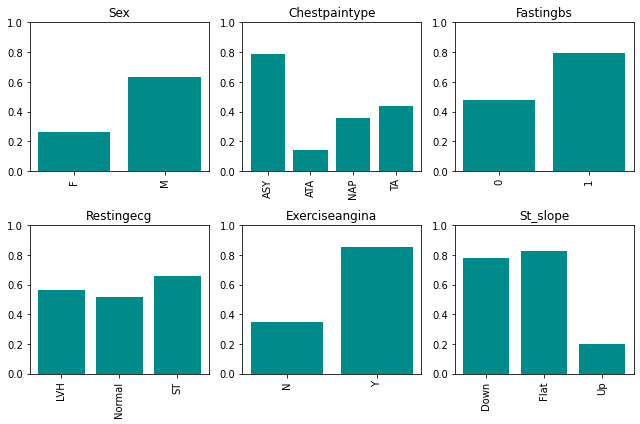

In [0]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
axs = axs.flatten()

# Plot class distribution for each categorical feature
for i, feature in enumerate(categorical_features):
    
    # Group data by feature and outcome (class 0 and 1)
    data = df.groupby([feature, 'HeartDisease'])['HeartDisease'].count().unstack()
    
    # Normalize data by row to get percentage
    data = data.div(data.sum(axis=1), axis=0)
    
    # Plot bar plot for class 1 only
    axs[i].bar(data.index, data[1], color='darkcyan')
    
    # Set title
    axs[i].set_title(feature.capitalize())
    
    # Rotate x-axis labels if feature name is longer than 4 characters
    if len(feature) > 2:
        axs[i].tick_params(axis='x', labelrotation=90)
    
    # Set y-axis limits to 0 and 1 for class 1
    axs[i].set_ylim(0, 1)
    
plt.tight_layout()
plt.show()


When ploting bar chart comparing categories in categorical features, we see that:
* Male tend to have heart disease more than women
* People with ASY chest pain type has more risk getting heart disease more than other chest paint types, following are TA and NAP types.
* People with FastingBS have more risk getting heart disease
* People with strange resting ECG have more risk getting heart disease.
* People with exercise with angina have more risk getting heart disease
* Most of people with heart disease have down and flat st_slope.

## NORMALIZE VARIABLES

In [0]:
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

In [0]:
spark_clean_df = spark.createDataFrame(df)

In [0]:
from pyspark.sql.types import DoubleType, IntegerType

# Cast columns to appropriate data types
spark_clean_df = spark_clean_df.withColumn("age", spark_clean_df["age"].cast(IntegerType())) \
    .withColumn("RestingBP", spark_clean_df["RestingBP"].cast(IntegerType())) \
    .withColumn("Cholesterol", spark_clean_df["Cholesterol"].cast(IntegerType())) \
    .withColumn("FastingBS", spark_clean_df["FastingBS"].cast(IntegerType())) \
    .withColumn("MaxHR", spark_clean_df["MaxHR"].cast(IntegerType())) \
    .withColumn("HeartDisease", spark_clean_df["HeartDisease"].cast(IntegerType()))\
    .withColumn("Oldpeak", spark_clean_df["Oldpeak"].cast(DoubleType()))

In [0]:
target = 'HeartDisease'

In [0]:
# Spark categorical variables
dtypes = spark_clean_df.dtypes
cat_input = []
for i in range(0, len(spark_clean_df.columns)):
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) 
cat_input = list(set(cat_input)-set(target))

In [0]:
num_input = list(set(spark_clean_df.columns) - set([target]) - set(cat_input))

In [0]:
from pyspark.sql.functions import *
# final check for null value in Spark dataframe
null_counts = spark_clean_df.select([when(isnull(c), 1).otherwise(0).alias(c) for c in spark_clean_df.columns]).groupBy().sum()
print("Final check for null values:")
for column in spark_clean_df.columns:
    print(f"{column}: {null_counts.collect()[0][f'sum({column})']}")

Final check for null values:
age: 0
Sex: 0
ChestPainType: 0
RestingBP: 0
Cholesterol: 0
FastingBS: 0
RestingECG: 0
MaxHR: 0
ExerciseAngina: 0
Oldpeak: 0
ST_Slope: 0
HeartDisease: 0


**1.Standardize numerical variables**

In [0]:
class Standardizer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(Standardizer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)

    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)
        
    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol()
      in_col = dataset[self.getInputCol()]
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first()
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin)) 

In [0]:
standardizers = [Standardizer(inputCol = column, outputCol = column+"_standardized") for column in num_input]

**2. Dummy encoder**

In [0]:
indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input]
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input]

**3. Combine**

In [0]:
import functools
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
input_cols = []
for i in cat_input:
  input_cols.append(i+"_dummy")
for i in num_input:
  input_cols.append(i+"_standardized")

In [0]:
stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #concatenate all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [indexers, encoders, standardizers]) #indexers,  encoders, standardizers])
stages.append(assembler)

**4. Create Spark Pipeline**

In [0]:
from pyspark.ml import Pipeline

# Create a pipeline with the stages
pipeline = Pipeline(stages=stages)

# Fit the pipeline on the input DataFrame and transform it
spark_clean_df = pipeline.fit(spark_clean_df).transform(spark_clean_df)

## TRAIN THE MODEL

**1. Split data**

In [0]:
train, test = spark_clean_df.randomSplit([0.7, 0.3], seed = 2008) # 70% to the training and 30% to the testing set with random seed reproducibility. 
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 627
Test Dataset Count: 291


**2. Train the logistic regression model**

In [0]:
from pyspark.ml.regression import *
from pyspark.ml.classification import LogisticRegression

In [0]:
# create logistic regression
logi = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10) # Linear regressiion model with 10 maximum number of iteration for optimization algorithm.
logi_model = logi.fit(train)

#tranform model to test
logi_result = logi_model.transform(test)
logi_result.select('HeartDisease', 'prediction','features').show(10)

+------------+----------+--------------------+
|HeartDisease|prediction|            features|
+------------+----------+--------------------+
|           0|       0.0|[0.0,0.0,1.0,0.0,...|
|           0|       0.0|[0.0,0.0,1.0,0.0,...|
|           0|       0.0|[0.0,1.0,0.0,0.0,...|
|           0|       0.0|[0.0,1.0,0.0,0.0,...|
|           1|       0.0|[1.0,0.0,0.0,1.0,...|
|           0|       0.0|[0.0,1.0,0.0,0.0,...|
|           0|       0.0|(15,[2,4,7,10,11,...|
|           1|       1.0|[1.0,0.0,0.0,1.0,...|
|           1|       1.0|[1.0,0.0,0.0,1.0,...|
|           0|       0.0|(15,[1,4,7,10,11,...|
+------------+----------+--------------------+
only showing top 10 rows



## MODEL EVALUATION

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


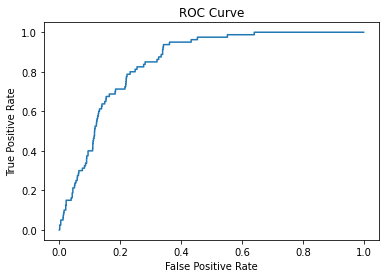

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        for row in rdd.collect():
            points.append((float(row._1()), float(row._2())))
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)


# Convert probabilities and labels to RDD
preds = predictions.select('stroke', 'probability').rdd.map(lambda x: (float(x['probability'][1]), float(x['stroke'])))

# Instantiate CurveMetrics
curve_metrics = CurveMetrics(preds)

# Get ROC curve
points = curve_metrics.get_curve('roc')

# Extract x and y values from points
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]

# Plot ROC curve
plt.figure()
plt.plot(x_val, y_val)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()